In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump


df = pd.read_csv("post natal data.csv")
df

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  1503 non-null   object
 1   Age                                        1503 non-null   object
 2   Feeling sad or Tearful                     1503 non-null   object
 3   Irritable towards baby & partner           1497 non-null   object
 4   Trouble sleeping at night                  1503 non-null   object
 5   Problems concentrating or making decision  1491 non-null   object
 6   Overeating or loss of appetite             1503 non-null   object
 7   Feeling anxious                            1503 non-null   object
 8   Feeling of guilt                           1494 non-null   object
 9   Problems of bonding with baby              1503 non-null   object
 10  Suicide attempt                     

In [26]:
df.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [27]:
df.isnull().mean() * 100

Timestamp                                    0.000000
Age                                          0.000000
Feeling sad or Tearful                       0.000000
Irritable towards baby & partner             0.399202
Trouble sleeping at night                    0.000000
Problems concentrating or making decision    0.798403
Overeating or loss of appetite               0.000000
Feeling anxious                              0.000000
Feeling of guilt                             0.598802
Problems of bonding with baby                0.000000
Suicide attempt                              0.000000
dtype: float64

In [28]:
df = df.dropna()
df.isnull().mean() * 100

Timestamp                                    0.0
Age                                          0.0
Feeling sad or Tearful                       0.0
Irritable towards baby & partner             0.0
Trouble sleeping at night                    0.0
Problems concentrating or making decision    0.0
Overeating or loss of appetite               0.0
Feeling anxious                              0.0
Feeling of guilt                             0.0
Problems of bonding with baby                0.0
Suicide attempt                              0.0
dtype: float64

In [29]:
def categorico_a_numerico(df, columna):
    atributos = {}
    for index, atributo in enumerate(df[columna].unique()):
        atributos[index] = atributo

    df[columna] = df[columna].replace(
    atributos.values(),
    atributos.keys()
    )
    return df[columna]

In [30]:
df = df.drop(['Timestamp'], axis=1)

In [31]:
for key in df.keys():
    df[key] = categorico_a_numerico(df, key)
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,1,1,0,1
2,0,0,1,2,0,0,0,0,1,1
3,0,0,0,2,0,1,0,2,2,1
4,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1498,2,0,1,0,1,1,0,2,1,1
1499,4,2,1,1,2,1,0,2,0,1
1500,4,1,2,0,1,1,1,1,2,2
1501,4,1,2,2,2,1,0,0,2,1


In [32]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("&", "and")
df

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_anxious,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt
0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,1,1,0,1
2,0,0,1,2,0,0,0,0,1,1
3,0,0,0,2,0,1,0,2,2,1
4,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1498,2,0,1,0,1,1,0,2,1,1
1499,4,2,1,1,2,1,0,2,0,1
1500,4,1,2,0,1,1,1,1,2,2
1501,4,1,2,2,2,1,0,0,2,1


<AxesSubplot: xlabel='feeling_sad_or_tearful,age'>

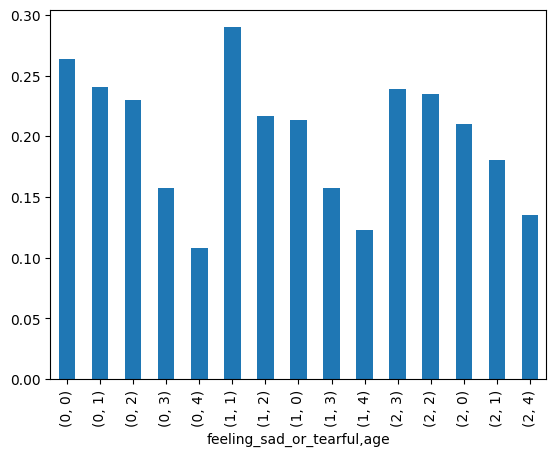

In [33]:
df.groupby("feeling_sad_or_tearful").age.value_counts(normalize=True).plot(kind = 'bar')

<AxesSubplot: xlabel='irritable_towards_baby_and_partner,age'>

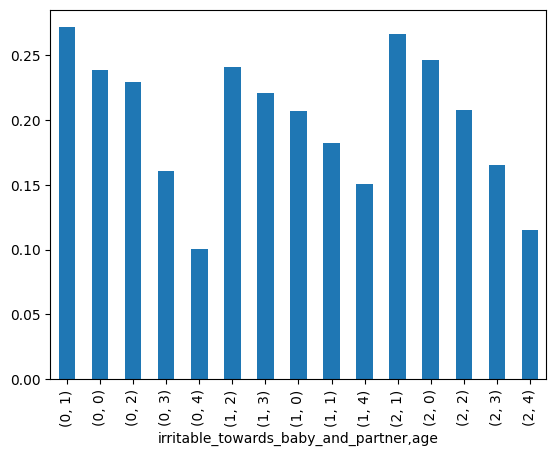

In [34]:
df.groupby("irritable_towards_baby_and_partner").age.value_counts(normalize=True).plot(kind = 'bar')

<AxesSubplot: xlabel='trouble_sleeping_at_night,age'>

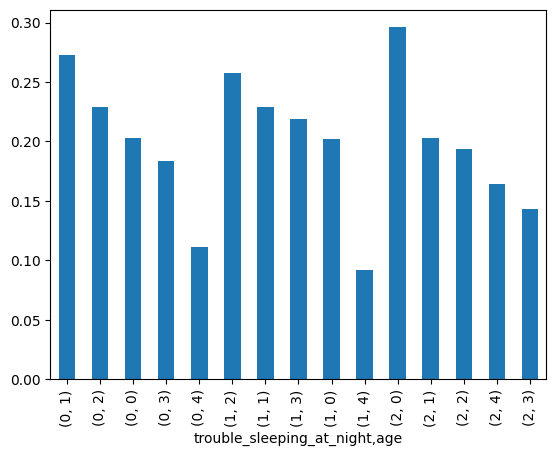

In [35]:
df.groupby("trouble_sleeping_at_night").age.value_counts(normalize=True).plot(kind = 'bar')

<AxesSubplot: xlabel='problems_concentrating_or_making_decision,age'>

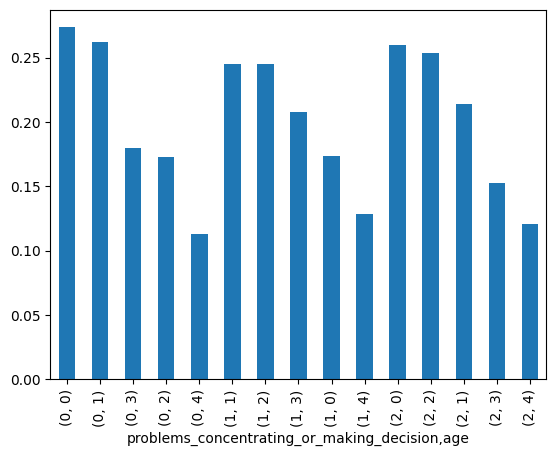

In [36]:
df.groupby("problems_concentrating_or_making_decision").age.value_counts(normalize=True).plot(kind = 'bar')

<AxesSubplot: xlabel='overeating_or_loss_of_appetite,age'>

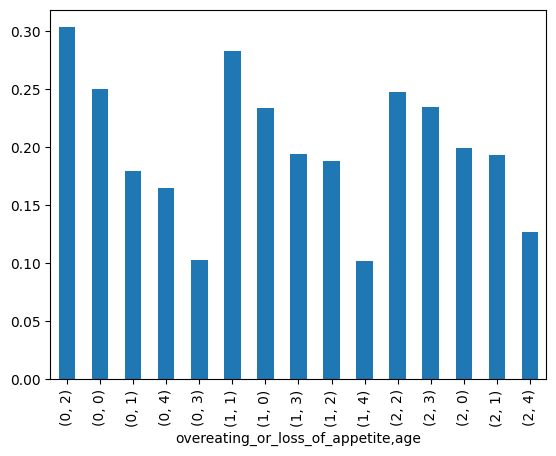

In [37]:
df.groupby("overeating_or_loss_of_appetite").age.value_counts(normalize=True).plot(kind = 'bar')

<AxesSubplot: xlabel='feeling_of_guilt,age'>

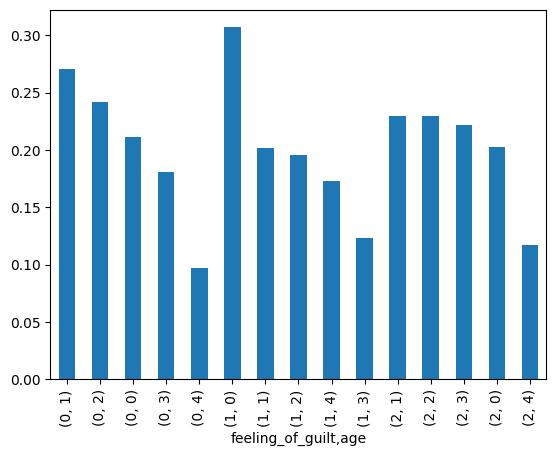

In [38]:
df.groupby("feeling_of_guilt").age.value_counts(normalize=True).plot(kind = 'bar')

<AxesSubplot: xlabel='problems_of_bonding_with_baby,age'>

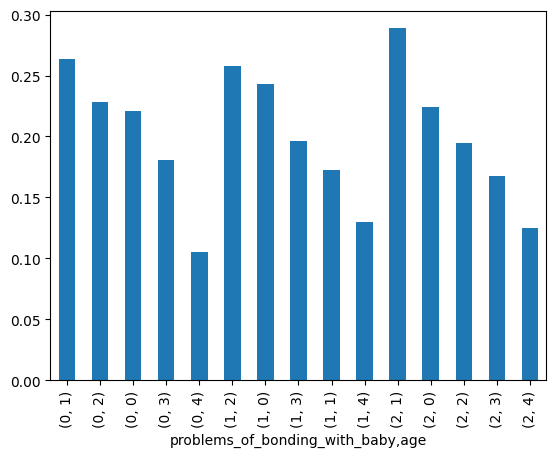

In [39]:
df.groupby("problems_of_bonding_with_baby").age.value_counts(normalize=True).plot(kind = 'bar')

<AxesSubplot: xlabel='suicide_attempt,age'>

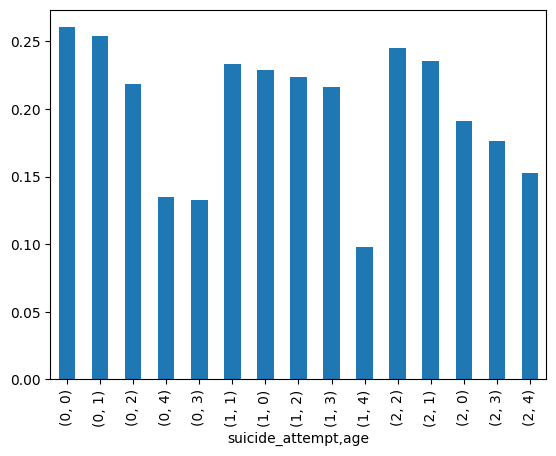

In [40]:
df.groupby("suicide_attempt").age.value_counts(normalize=True).plot(kind = 'bar')

In [41]:
df.corr()

,age,feeling_sad_or_tearful,irritable_towards_baby_and_partner,trouble_sleeping_at_night,problems_concentrating_or_making_decision,overeating_or_loss_of_appetite,feeling_anxious,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt
age,1.000000,0.091226,0.014207,-0.014241,0.016552,0.033919,0.001239,0.045352,-0.005756,0.063443
feeling_sad_or_tearful,0.091226,1.000000,0.012339,-0.063734,0.089923,0.136576,0.023519,0.020715,-0.022319,0.099604
irritable_towards_baby_and_partner,0.014207,0.012339,1.000000,0.096328,0.151014,-0.132821,0.304727,0.165325,0.206396,0.202860
trouble_sleeping_at_night,-0.014241,-0.063734,0.096328,1.000000,0.250108,-0.021923,-0.056192,-0.125382,-0.012395,-0.052727
problems_concentrating_or_making_decision,0.016552,0.089923,0.151014,0.250108,1.000000,0.094161,-0.162768,-0.022223,0.072754,0.139228
overeating_or_loss_of_appetite,0.033919,0.136576,-0.132821,-0.021923,0.094161,1.000000,-0.183506,0.004046,-0.064463,0.042129
feeling_anxious,0.001239,0.023519,0.304727,-0.056192,-0.162768,-0.183506,1.000000,0.244966,0.225812,0.230247
feeling_of_guilt,0.045352,0.020715,0.165325,-0.125382,-0.022223,0.004046,0.244966,1.000000,-0.066009,0.268833
problems_of_bonding_with_baby,-0.005756,-0.022319,0.206396,-0.012395,0.072754,-0.064463,0.225812,-0.066009,1.000000,-0.037084
suicide_attempt,0.063443,0.099604,0.202860,-0.052727,0.139228,0.042129,0.230247,0.268833,-0.037084,1.000000


In [42]:
features = ['age', 'irritable_towards_baby_and_partner', 'feeling_of_guilt', "problems_of_bonding_with_baby", 'suicide_attempt']
label =  ['feeling_anxious']

X = df[features]
y = df[label]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [43]:
x_train

,age,irritable_towards_baby_and_partner,feeling_of_guilt,problems_of_bonding_with_baby,suicide_attempt
1044,4,0,0,2,0
1276,4,0,0,0,2
1325,3,0,0,1,1
148,4,2,0,0,0
24,3,2,0,2,1
...,...,...,...,...,...
583,3,2,2,0,2
1260,0,1,2,1,1
676,1,2,0,2,1
1243,3,2,2,2,1


In [44]:
clf = MLPClassifier(solver = "adam", learning_rate="adaptive")
clf.fit(x_train, y_train)

/home/santy/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/santy/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(learning_rate='adaptive')

In [52]:
y_test
y_pred = []
for index, row in x_test.iterrows():
    y_pred.append(clf.predict([row]))
pruebita 
print()    
    
print(accuracy_score(y_test, y_pred))

/home/santy/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/santy/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/santy/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/santy/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/santy/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/santy/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning

ValueError: too many values to unpack (expected 2)

In [140]:
confusion_matrix(y_test, y_pred)

array([[91,  9],
       [ 4, 46]])

In [142]:
dump(clf, "modelo_post_natal.joblib")

['modelo_post_natal.joblib']